In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import cufflinks as cf
cf.go_offline()

In [2]:
all_stars = pd.read_csv('NBA All Stars 2000-2019.csv')
all_stars.head()

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality
0,2019,Devin Booker,SG,6-6,206,Phoenix Suns,Western All-Star Replacement Selection,2015 Rnd 1 Pick 13,United States
1,2019,Anthony Davis,PF,6-10,253,Los Angeles Lakers,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States
2,2019,Luka Doncic,SF,6-7,218,Dallas Mavericks,Western All-Star Fan Vote Selection,2018 Rnd 1 Pick 3,Slovenia
3,2019,James Harden,SG,6-5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States
4,2019,LeBron James,F,6-8,250,Los Angeles Lakers,Western All-Star Fan Vote Selection,2003 Rnd 1 Pick 1,United States


### Split 'NBA Draft Status' into the Draft Year, Round, and Pick

In [3]:
draft_split = all_stars['NBA Draft Status'].str.split(" ", n =3, expand = True)
draft_split.head(2)

,0,1,2,3
0,2015,Rnd,1,Pick 13
1,2012,Rnd,1,Pick 1


In [4]:
all_stars['Draft Year'] = draft_split[0] 
all_stars['Draft Round'] = draft_split[2]
all_stars['Pick'] = draft_split[3]

In [5]:
all_stars = all_stars.drop('NBA Draft Status', axis = 1)
all_stars.head(3)

,Year,Player,Pos,HT,WT,Team,Selection Type,Nationality,Draft Year,Draft Round,Pick
0,2019,Devin Booker,SG,6-6,206,Phoenix Suns,Western All-Star Replacement Selection,United States,2015,1,Pick 13
1,2019,Anthony Davis,PF,6-10,253,Los Angeles Lakers,Western All-Star Fan Vote Selection,United States,2012,1,Pick 1
2,2019,Luka Doncic,SF,6-7,218,Dallas Mavericks,Western All-Star Fan Vote Selection,Slovenia,2018,1,Pick 3


### Grouped the 'Pos' into the three main positions (Center C, Forward F, Guard G)

In [6]:
all_stars['Position'] = all_stars['Pos'].map({'SF':'F', 'PF':'F', 'SG':'G', 'PG':'G', 'GF':'F', 'G-F':'F', 'F-C':'C', 'FC':'C',
                                             'F':'F', 'G':'G', 'C':'C'})

### Split the 'Selection Type' and Converted it into (Starter, Reserve or Replacement)

In [7]:
all_stars['Selection'] =  all_stars['Selection Type'].str.split(n = 2, expand = True)[2].map({'Fan Vote Selection': 'Starter',
                                                                                'Coaches Selection':'Reserve',
                                                                              'Replacement Selection': 'Replacement'})

### Changed 'Draft' in 'Draft Round' into 'Undrafted'

In [8]:
all_stars['Draft Round'] = all_stars['Draft Round'].str.replace('Draft,', 'Undrafted')
all_stars['Draft Round'].unique()

array(['1', '2', 'Undrafted', '3'], dtype=object)

### All-Stars by Nationality

In [9]:
all_stars.drop_duplicates(subset=['Player']).groupby('Nationality').count()['HT'].sort_values(ascending = False)

Nationality
United States                       111
Cameroon                              2
Spain                                 2
Slovenia                              2
Serbia                                2
France                                2
United StatesLithuania                1
Germany                               1
Australia                             1
Canada                                1
Canada\nSouth Africa                  1
China                                 1
Democratic Republic of the Congo      1
Dominican RepublicUnited States       1
England\nSouth Sudan                  1
France\nUnited States                 1
Latvia                                1
Germany\nUnited States                1
GreeceNigeria                         1
United StatesDominican Republic       1
Lithuania                             1
Russia                                1
Serbia\nGreece                        1
SwitzerlandMontenegro                 1
Turkey                      

### All-Stars height Frequency

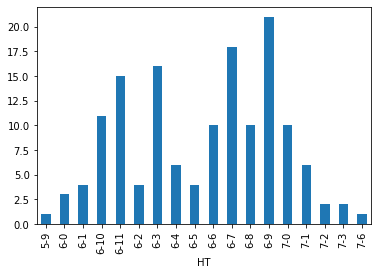

In [10]:
all_stars.drop_duplicates('Player').groupby('HT').count()['WT'].plot(kind = 'bar')

### All-Stars Weight distribution

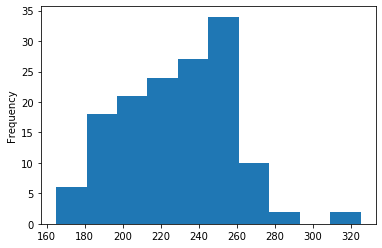

In [11]:
all_stars.groupby('Player')['WT'].mean().plot(kind = 'hist')

### Number of times a Team's player has been an All Star

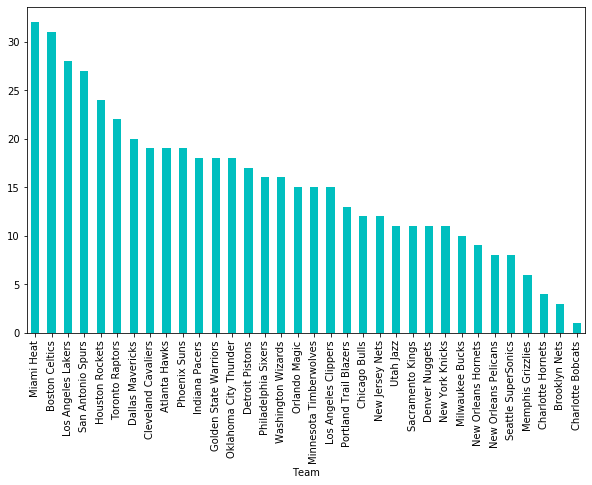

In [12]:
fig, ax = plt.subplots(figsize = (10,6))
all_stars.groupby('Team')['HT'].count().sort_values(ascending = False).plot(kind = 'bar', color = 'c')

In [13]:
all_stars.head(2)

,Year,Player,Pos,HT,WT,Team,Selection Type,Nationality,Draft Year,Draft Round,Pick,Position,Selection
0,2019,Devin Booker,SG,6-6,206,Phoenix Suns,Western All-Star Replacement Selection,United States,2015,1,Pick 13,G,Replacement
1,2019,Anthony Davis,PF,6-10,253,Los Angeles Lakers,Western All-Star Fan Vote Selection,United States,2012,1,Pick 1,F,Starter


### All-Stars by their Pick Number and Round

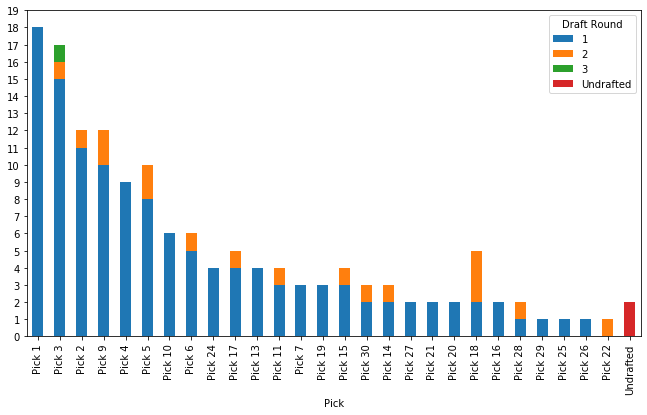

In [14]:
fig, ax = plt.subplots(figsize=(11,6))
all_stars.drop_duplicates('Player').groupby(['Draft Round','Pick']).count()['Position'].unstack().T.sort_values('1',
                                            ascending = False).plot(kind = 'bar', ax = ax, stacked =True)
plt.yticks(np.r_[0:20])
plt.show()

In [15]:
all_stars[all_stars['Pick'] == 'Pick 30'].drop_duplicates('Player')

,Year,Player,Pos,HT,WT,Team,Selection Type,Nationality,Draft Year,Draft Round,Pick,Position,Selection
15,2019,Jimmy Butler,GF,6-8,232,Miami Heat,Eastern All-Star Coaches Selection,United States,2011,1,Pick 30,F,Reserve
97,2016,Isaiah Thomas,PG,5-9,185,Boston Celtics,Eastern All-Star Coaches Selection,United States,2011,2,Pick 30,G,Reserve
194,2012,David Lee,FC,6-9,245,Golden State Warriors,Western All-Star Coaches Selection,United States,2005,1,Pick 30,C,Reserve


### Count of All Stars by Position

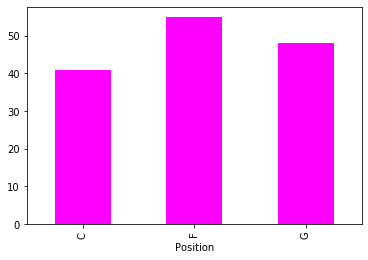

In [16]:
all_stars.drop_duplicates('Player').groupby('Position')['Pos'].count().plot(kind = 'bar', color = 'magenta')

### Counts of Position at each Draft Round

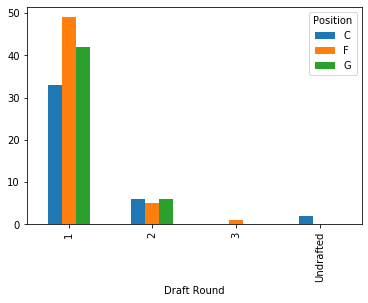

In [17]:
all_stars.drop_duplicates('Player').groupby(['Draft Round', 'Position']).count()['HT'].unstack().plot(kind = 'bar')

### Trend of Count of the Positions of All Stars between 2000 and 2019

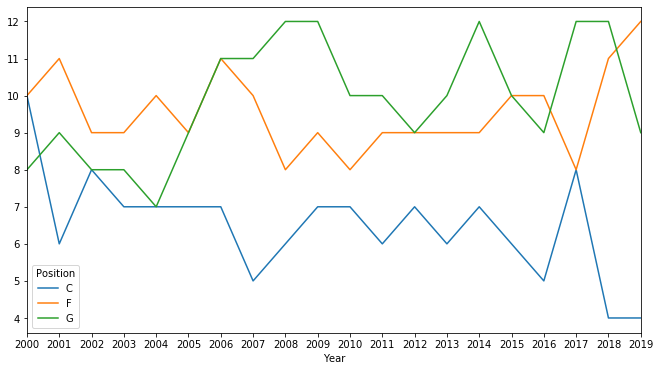

In [18]:
fig, ax = plt.subplots(figsize=(11,6))
all_stars.groupby(['Year', 'Position'])['Player'].count().unstack().plot(ax = ax)
plt.xticks(range(2000, 2020))
plt.show()

### Draft Year by Count of Selection Type

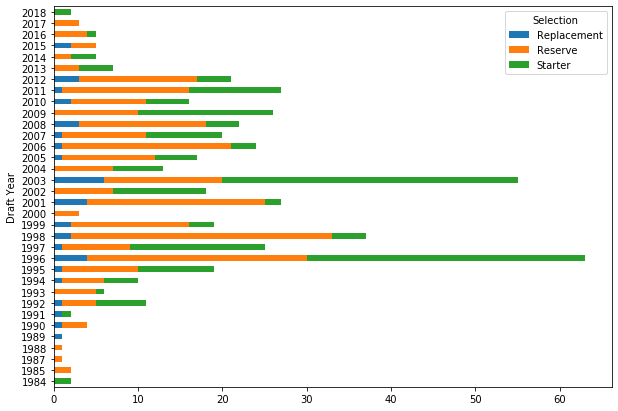

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
all_stars.groupby(['Draft Year', 'Selection'])['Team'].count().unstack().plot(kind = 'barh', stacked = True, ax = ax)

In [20]:
all_stars.head()

,Year,Player,Pos,HT,WT,Team,Selection Type,Nationality,Draft Year,Draft Round,Pick,Position,Selection
0,2019,Devin Booker,SG,6-6,206,Phoenix Suns,Western All-Star Replacement Selection,United States,2015,1,Pick 13,G,Replacement
1,2019,Anthony Davis,PF,6-10,253,Los Angeles Lakers,Western All-Star Fan Vote Selection,United States,2012,1,Pick 1,F,Starter
2,2019,Luka Doncic,SF,6-7,218,Dallas Mavericks,Western All-Star Fan Vote Selection,Slovenia,2018,1,Pick 3,F,Starter
3,2019,James Harden,SG,6-5,220,Houston Rockets,Western All-Star Fan Vote Selection,United States,2009,1,Pick 3,G,Starter
4,2019,LeBron James,F,6-8,250,Los Angeles Lakers,Western All-Star Fan Vote Selection,United States,2003,1,Pick 1,F,Starter


### Player Years as an All Star

In [21]:
player_year_selected_df = all_stars.groupby(['Player', 'Year']).count()['Pos'].unstack()
player_year_selected_df.head(3)

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Player,,,,,,,,,,,,,,,,,,,,
Al Horford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN
Allan Houston,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Allen Iverson,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
years = []
for player in player_year_selected_df.index:
    lis = list(player_year_selected_df.loc[player].dropna().index)
    years.append(", ".join(str(n) for n in lis))

In [23]:
player_year_selected_df['Years Honoured'] = years

In [24]:
player_all_star_years = player_year_selected_df[['Years Honoured']].reset_index()

In [25]:
player_all_star_years.head(3)

Year,Player,Years Honoured
0,Al Horford,"2009, 2010, 2014, 2015, 2017"
1,Allan Houston,2000
2,Allen Iverson,"2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007..."


### Player by Type of selection

In [26]:
all_stars.groupby(['Player', 'Selection']).count()['Pos'].unstack().fillna('').reset_index().head(3)

Selection,Player,Replacement,Reserve,Starter
0,Al Horford,1,4,
1,Allan Houston,,1,
2,Allen Iverson,,1,9


### Joined Years as an All Star to Selection type table

In [27]:
pd.concat([all_stars.groupby(['Player', 'Selection']).count()['Pos'].unstack().fillna('').reset_index(),
           player_all_star_years['Years Honoured']], axis = 1)

,Player,Replacement,Reserve,Starter,Years Honoured
0,Al Horford,1,4,,"2009, 2010, 2014, 2015, 2017"
1,Allan Houston,,1,,2000
2,Allen Iverson,,1,9,"2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007..."
3,Alonzo Mourning,,1,1,"2000, 2001"
4,Amar'e Stoudemire,,3,3,"2004, 2006, 2007, 2008, 2009, 2010"
5,Andre Drummond,1,1,,"2015, 2017"
6,Andre Iguodala,,1,,2011
7,Andrei Kirilenko,,1,,2003
8,Andrew Bynum,,,1,2011
9,Antawn Jamison,,2,,"2004, 2007"


### Year in which Team had the Most All stars and their total number consecutively

In [28]:
team_year = all_stars.pivot_table(index = 'Team', columns= 'Year', values = 'Player', aggfunc= 'count')
team_year.head(2)

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Team,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,1.0,NaN,1.0,4.0,2.0,1.0,NaN,NaN,1.0
Boston Celtics,NaN,2.0,2.0,1.0,1.0,1.0,NaN,3.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,1.0,1.0,2.0,1.0,2.0


In [29]:
team_year = team_year.T

In [30]:
team_year.head(2)

Team,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Bobcats,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,...,Orlando Magic,Philadelphia Sixers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Seattle SuperSonics,Toronto Raptors,Utah Jazz,Washington Wizards
Year,,,,,,,,,,,,,,,,,,,,,
2000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,NaN
2001,1.0,2.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,...,1.0,2.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0


In [31]:
team_year.nlargest(3, 'Golden State Warriors')['Golden State Warriors']

Year
2016    4.0
2017    4.0
2015    3.0
Name: Golden State Warriors, dtype: float64

In [32]:
years_with_most_allstars = []
for team in team_year.columns:
    years_with_most_allstars.append(team_year.nlargest(3, team, keep = 'all')[team])

In [33]:
list_of_yearlist = [list(j.index) for j in years_with_most_allstars]

list_of_allstar_peryear = [list(k.values) for k in years_with_most_allstars]

In [34]:
p = []
for i in list_of_yearlist:
    p.append(", ".join(str(item) for item in i))
    
o = []    
for no in list_of_allstar_peryear:
    o.append(", ".join(str(each)[0] for each in no))

In [35]:
team_year = team_year.T

In [36]:
team_year['years_with_most_allstar'] = p

team_year['number per year'] = o

In [37]:
team_year[['years_with_most_allstar', 'number per year']]

Year,years_with_most_allstar,number per year
Team,,
Atlanta Hawks,"2014, 2009, 2010, 2015","4, 2, 2, 2"
Boston Celtics,"2010, 2007, 2008, 2009","4, 3, 3, 3"
Brooklyn Nets,"2012, 2013, 2018","1, 1, 1"
Charlotte Bobcats,2009,1
Charlotte Hornets,"2001, 2016, 2017, 2018","1, 1, 1, 1"
Chicago Bulls,"2011, 2012, 2014, 2015","2, 2, 2, 2"
Cleveland Cavaliers,"2016, 2004, 2008, 2014, 2017","3, 2, 2, 2, 2"
Dallas Mavericks,"2001, 2002, 2006, 2009","2, 2, 2, 2"
Denver Nuggets,"2006, 2007, 2009","2, 2, 2"
